In [ ]:
import pandas as pd
import os
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

In [ ]:
FORESIGHT_DIRECTORY = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
DATA_PROCESSED_DIRECTORY = os.path.join(FORESIGHT_DIRECTORY, "data", "processed")

# Nombre de archivo
TRAIN_FILENAME = "X_train.csv"
TEST_FILENAME = "X_test.csv"

# Rutas completas
TRAIN_PATH = os.path.join(DATA_PROCESSED_DIRECTORY, TRAIN_FILENAME)
TEST_PATH = os.path.join(DATA_PROCESSED_DIRECTORY, TEST_FILENAME)

In [ ]:
X_test = pd.read_csv(TEST_PATH)
X_train = pd.read_csv(TRAIN_PATH)

In [ ]:
X_test.shape

(45000, 94)

In [ ]:
y_train = X_train['difficulty']
X_train = X_train.drop('difficulty', axis=1)
y_test = X_test['difficulty']
X_test = X_test.drop('difficulty', axis=1)

In [ ]:
xgb_base = XGBClassifier(
    objective='multi:softprob',
    num_class=5,  # ajusta si tus clases son más o menos
    eval_metric='mlogloss',
    n_jobs=-1,
    verbosity=1,
    random_state=42
)


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [ ]:
grid_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=48,
    scoring='f1_macro',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train)

# Predicción con el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluación
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores hiperparámetros encontrados:
{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      4062
           1       0.67      0.76      0.71     10839
           2       0.51      0.54      0.52      5982
           3       0.23      0.03      0.06      1228
           4       0.17      0.02      0.03       240
           5       0.10      0.02      0.03        60
           6       0.39      0.20      0.26      2093
           7       0.32      0.05      0.08       757
           8       0.00      0.00      0.00       126
           9       0.90      0.97      0.93     19613

    accuracy                           0.74     45000
   macro avg       0.39      0.32      0.33     45000
weighted avg       0.71      0.74      0.72     45000



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7439


In [ ]:
grid_search.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'max_depth': 8,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8}

In [ ]:
from sklearn.metrics import confusion_matrix

# Supongamos que ya hiciste predicciones
# y_test: etiquetas verdaderas
# y_pred: etiquetas predichas por tu modelo

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2521  1439    47     0     1     1    22     2     1    28]
 [ 1149  8245  1140     8     1     2   116     6     0   172]
 [   72  1856  3238    51     1     0   191    14     0   559]
 [   17    75   676    39     7     1    51    12     0   350]
 [    7     1    96    13     4     2     1     4     0   112]
 [    0     0     6     3     1     1     0     1     0    48]
 [   15   535   601    16     2     0   413    11     0   500]
 [    5    88   180    13     1     0    89    35     2   344]
 [    0     5    20     0     0     0    27     6     0    68]
 [   10    42   370    28     6     3   154    20     2 18978]]


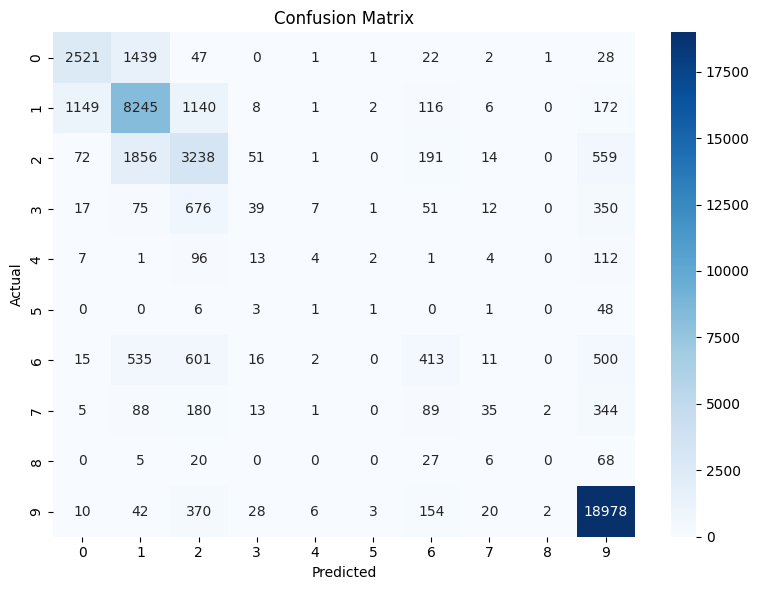

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(cm.shape[0]), yticklabels=range(cm.shape[0]))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()